***Project description:***

We, the analysis department, and the marketing department have raised some hypotheses that can contribute to our business.

-Our first task is to prioritize these hypotheses.

-Our second task is to run an A / B test and analyze the results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import factorial
from nltk.stem import SnowballStemmer 
from scipy import stats as st
import scipy.stats as stats

*First task:*

We will start by loading the data and checking its integrity.

In [2]:
pd.set_option('display.max_colwidth', None)
data1 = pd.read_csv('/datasets/hypotheses_us.csv', sep=";")
data1.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
data1.columns= data1.columns.str.lower()
data1.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [4]:
data1.duplicated().sum()

0

In [5]:
data1.isnull().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

We loaded the data, and separated columns (because it came without separating the columns).

No duplicates found.

We changed the lowercase letters in the column names.

No missing values were found.

Prioritization of hypotheses:

ICE framework:

In [6]:
data1['ICE']= (data1['impact']*data1['confidence'])/data1['effort']
data1=data1.round(1)
data1.sort_values(by=['ICE'], ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0


According to the ICE model the 3 hypotheses that are better to try first are 8,0 and 7.

RICE framework:

In [7]:
data1['RICE']= (data1['reach']*data1['impact']*data1['confidence'])/data1['effort']
data1.sort_values(by=['RICE'], ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


According to the RICE model, the 3 hypotheses that are better to try first are 7,2 and 0.

Comparison of ICE and RICE:

We can see that the priority of hypotheses changed completely when we added the 'reach' parameter.
This change is due to the fact that not all hypotheses apply to all users and not every change affects everyone. Therefore if we want to know the size of the change we will choose RICE, and if we do not choose ICE.

conclusion:

According to the ICE model, hypotheses 8, 8 and 7 were chosen.

According to the RICE model, hypotheses 7, 2 and 0 were chosen.

*Second task:*

In [8]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders.columns= orders.columns.str.lower()
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
orders.duplicated().sum()

0

In [10]:
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visits.duplicated().sum()

0

In [13]:
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

No duplicates and missing values ​​were found in the two data sets.

In [14]:
users_n_groups = orders.groupby('visitorid').agg({'group': 'nunique'}).reset_index() 
# users_to_drop = users_n_groups[users_n_groups.group > 1]
# CODE FROM REVIEWER
users_to_drop = users_n_groups[users_n_groups.group > 1].visitorid
users_to_drop.count()

58

In [15]:
orders = orders[~orders['visitorid'].isin(users_to_drop)]
print(f'The updated dataset now has {orders.shape[0]} entries')

The updated dataset now has 1016 entries


There are 58 users found in the 2 groups.
Users have been removed.

In [16]:
orders['visitorid'].duplicated().sum()

43

1.cumulative revenue by group:

In [17]:
group_a = orders.query('group == "A"')

In [18]:
group_b = orders.query('group == "B"')

Cumulative income Group A:

In [19]:
group_a=group_a.groupby('date')['revenue'].sum().reset_index()
group_a['cumul_rev']=group_a['revenue'].cumsum()
group_a.head()

,date,revenue,cumul_rev
0,2019-08-01,2266.6,2266.6
1,2019-08-02,1468.3,3734.9
2,2019-08-03,1815.2,5550.1
3,2019-08-04,675.5,6225.6
4,2019-08-05,1398.0,7623.6


Cumulative income Group B:

In [20]:
group_b=group_b.groupby('date')['revenue'].sum().reset_index()
group_b['cumul_rev']=group_b['revenue'].cumsum()
group_b.head()

,date,revenue,cumul_rev
0,2019-08-01,967.2,967.2
1,2019-08-02,2568.1,3535.3
2,2019-08-03,1071.6,4606.9
3,2019-08-04,1531.6,6138.5
4,2019-08-05,1449.3,7587.8


Comparison of cumulative income between the two groups:

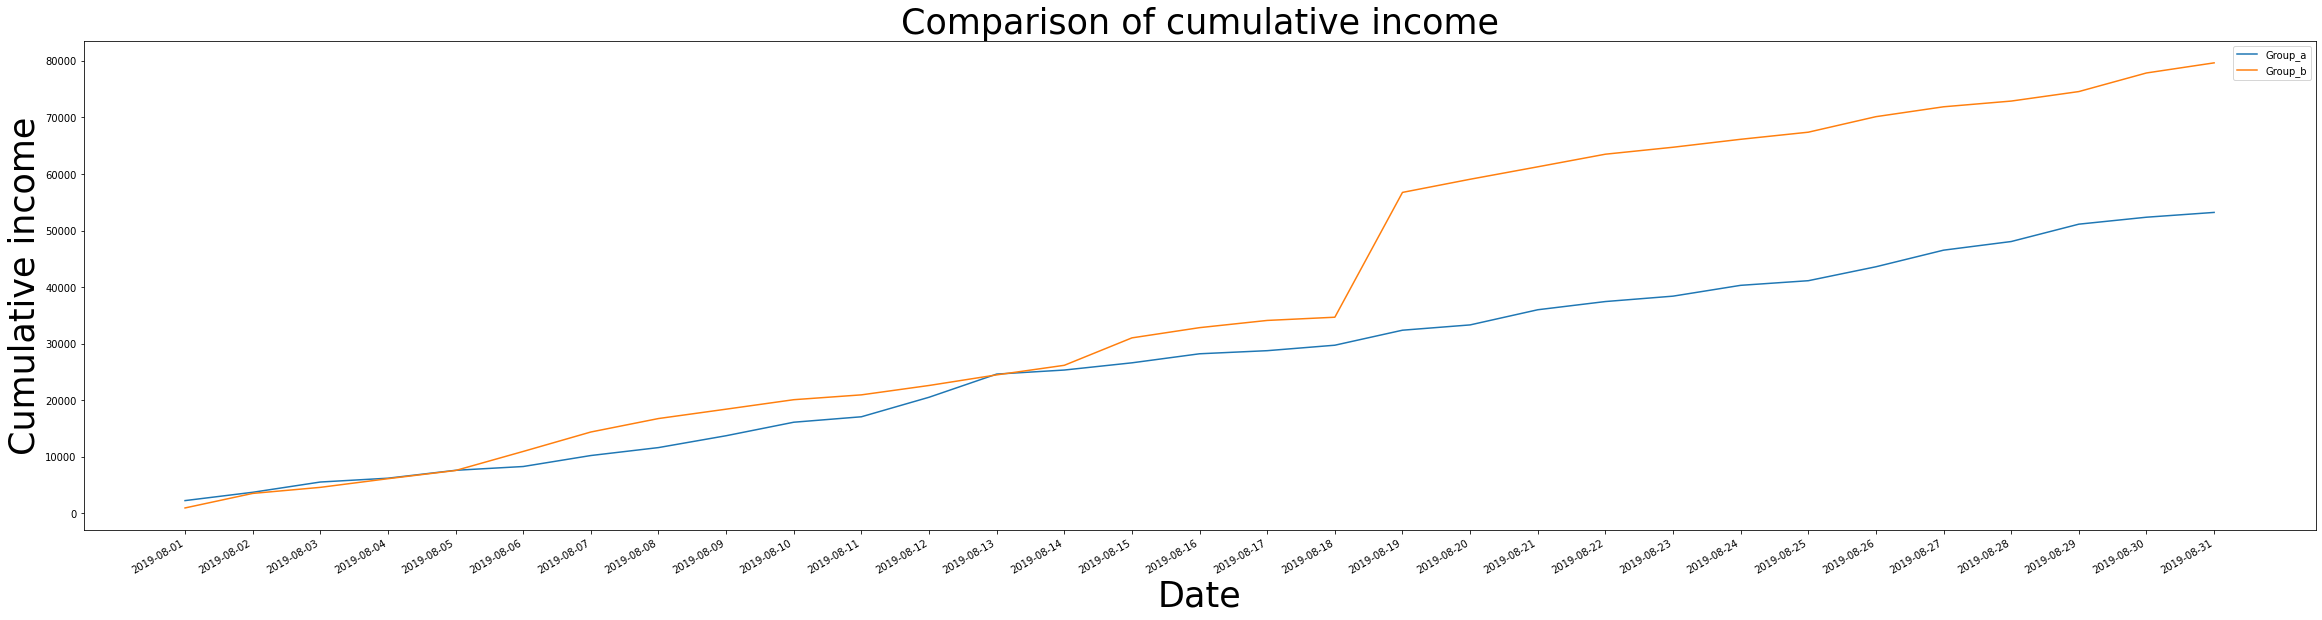

In [21]:
fig= plt.figure(figsize=(40,10))
# plt.rcParams["figure.figsize"] = (40,10)
plt.title('Comparison of cumulative income', fontdict={'fontsize': 35})
plt.xlabel("Date", fontdict={'fontsize': 35})
plt.ylabel("Cumulative income", fontdict={'fontsize': 35})
plt.plot(group_a['date'], group_a['cumul_rev'], label='Group_a')
plt.plot(group_b['date'], group_b['cumul_rev'], label='Group_b')
fig.autofmt_xdate()
plt.legend();

We can clearly see that the cumulative income from group B is much higher than group A.
However, if you look closely you can see that the revenues are quite similar except for servel days when Group B had a very significant increase in revenues. It could be from one very big purchase or something special that happened to this group that day.

2.cumulative average check by group and the relative change:

In [22]:
# building an array with unique paired date-group values
datesgroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersagg= datesgroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])
                                              ].agg({
    'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitsagg = datesgroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumudata = ordersagg.merge(visitsagg, left_on=['date', 'group'], right_on=['date', 'group'])
cumudata.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumudata.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [23]:
opu= orders.groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
opu.columns = ['visitorid', 'order']
orders= orders.merge(opu, how='left', on='visitorid')
orders.head()

,transactionid,visitorid,date,revenue,group,order
0,3667963787,3312258926,2019-08-15,30.4,B,1
1,2804400009,3642806036,2019-08-15,15.2,B,1
2,3797467345,1196621759,2019-08-15,155.1,B,1
3,2282983706,2322279887,2019-08-15,40.5,B,1
4,182168103,935554773,2019-08-15,35.0,B,1


Cumulative average order size group A:

In [24]:
xa=cumudata[cumudata['group']=='A'][['date','orders','revenue', 'visits']]
xa['avg_order_size']=xa['revenue']/xa['orders']
xa.head()

,date,orders,revenue,visits,avg_order_size
0,2019-08-01,23,2266.6,719,98.547826
2,2019-08-02,42,3734.9,1338,88.926190
4,2019-08-03,66,5550.1,1845,84.092424
6,2019-08-04,77,6225.6,2562,80.851948
8,2019-08-05,99,7623.6,3318,77.006061


The average order size seems to decrease over time, although there are more orders.

Corollary: People buy with less money.

Cumulative average order size group B:

In [25]:
xb=cumudata[cumudata['group']=='B'][['date','orders','revenue', 'visits']]
xb['avg_order_size']=xb['revenue']/xb['orders']
xb.head()

,date,orders,revenue,visits,avg_order_size
1,2019-08-01,17,967.2,713,56.894118
3,2019-08-02,40,3535.3,1294,88.382500
5,2019-08-03,54,4606.9,1803,85.312963
7,2019-08-04,68,6138.5,2573,90.272059
9,2019-08-05,89,7587.8,3280,85.256180


The average order size seems to increase over time and so does the number of orders.

3.Graph the relative difference in cumulative average order size for group B compared with group A:

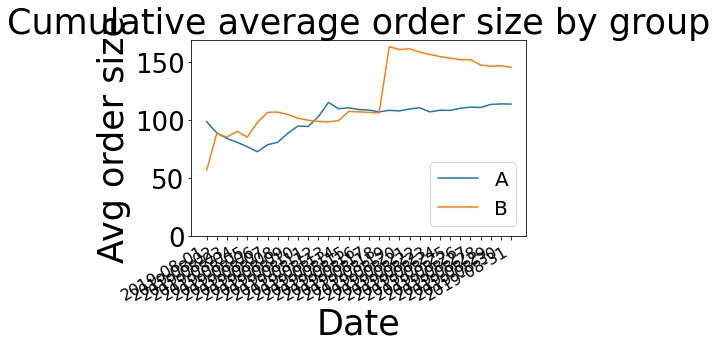

In [26]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,10)
plt.title('Cumulative average order size by group', fontdict={'fontsize': 35})
plt.xlabel("Date", fontdict={'fontsize': 35})
plt.ylabel("Avg order size", fontdict={'fontsize': 35})
plt.plot(xa['date'], xa['avg_order_size'], label='A')
plt.plot(xb['date'], xb['avg_order_size'], label='B')
plt.rc('font', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=26)
ax.set_ylim(ymin=0)
fig.autofmt_xdate()
plt.legend();

We can clearly see that the average order size of Group B is much higher than Group A.
It can be seen that almost throughout the graph the average order size of Group B is larger (except for a small bypass of Group A) but not by much, until for a few days there is a sharp increase in the average order size of Group B.
This can probably happen from a large amount of Group B orders or some very large purchases that have raised the average (something that very much connects us with the previous graph as well).

4.Conversion rate of each group as a ratio of bookings to number of visits each day:

In [27]:
xa['conversion']=xa['orders']/xa['visits']
xb['conversion']=xb['orders']/xb['visits']

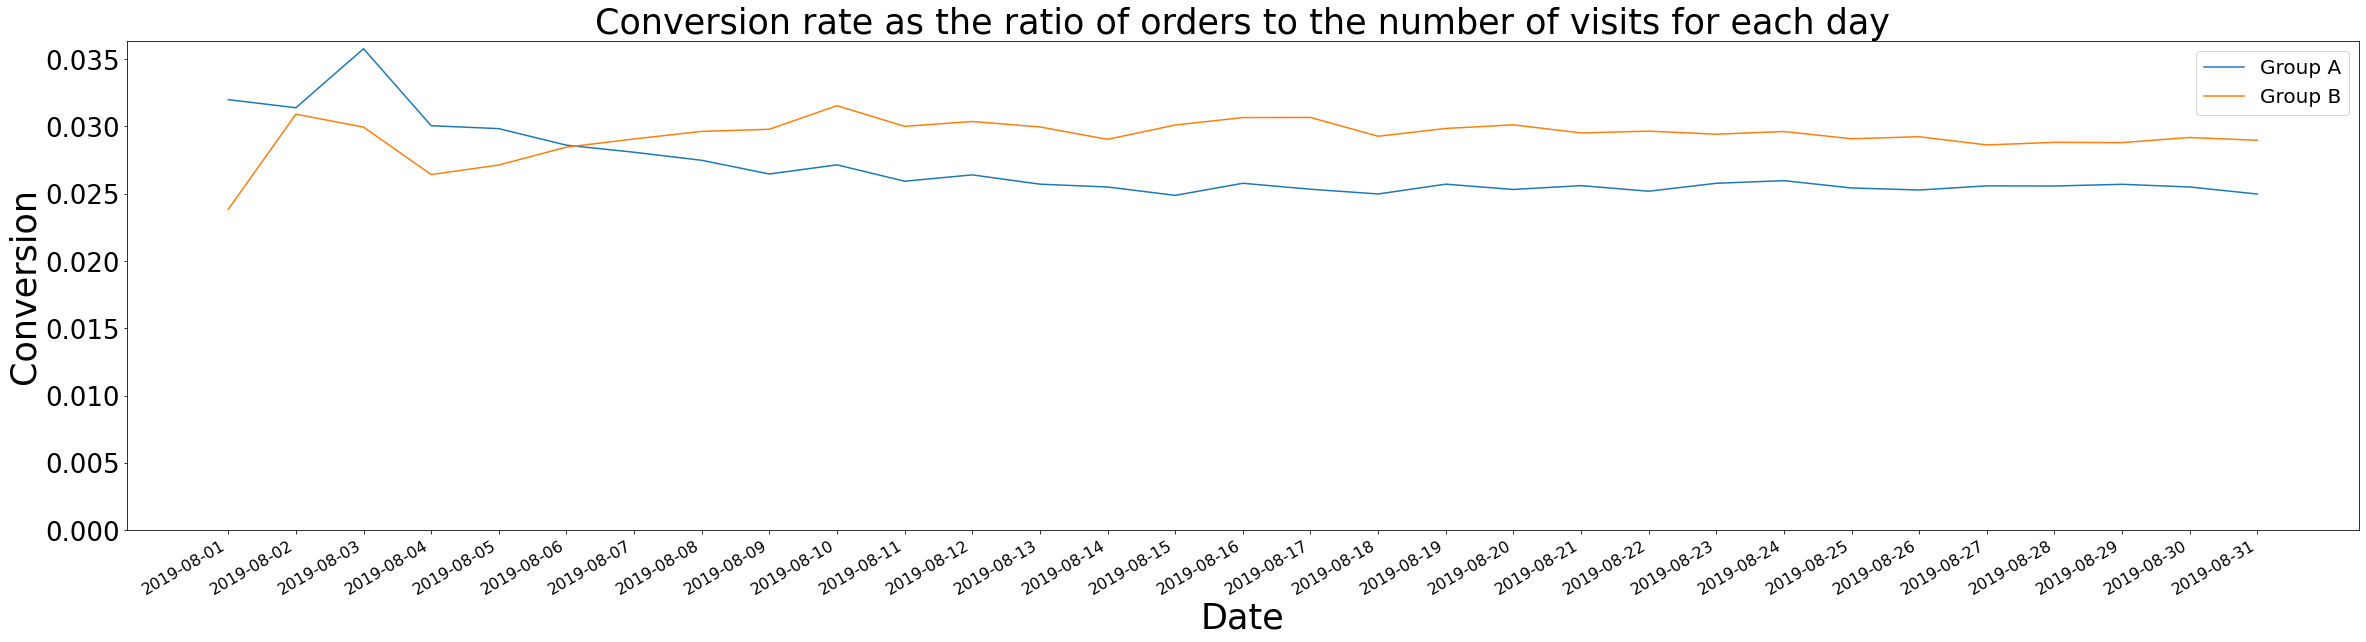

In [28]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,10)
plt.title('Conversion rate as the ratio of orders to the number of visits for each day', fontdict={'fontsize': 35})
plt.xlabel("Date", fontdict={'fontsize': 35})
plt.ylabel("Conversion", fontdict={'fontsize': 35})
plt.plot(xa['date'], xa['conversion'], label='Group A')
plt.plot(xb['date'], xb['conversion'], label='Group B')
plt.xticks(fontsize=16)
plt.yticks(fontsize=26)
ax.set_ylim(ymin=0)
fig.autofmt_xdate()
plt.legend();

The conversion rate seemed to be much higher in Group A at first but both were on the rise. After two days they both changed the trend and started crashing but Group B stopped the crash and started rising until it reached a rate of 3.7% and started to shuffle compared to Group A which continued to crash until it reached a ratio of 3% and there it started to shake.
The same event that affected the previous graphs is repeated here.

5.Scatter chart of the number of orders per user:

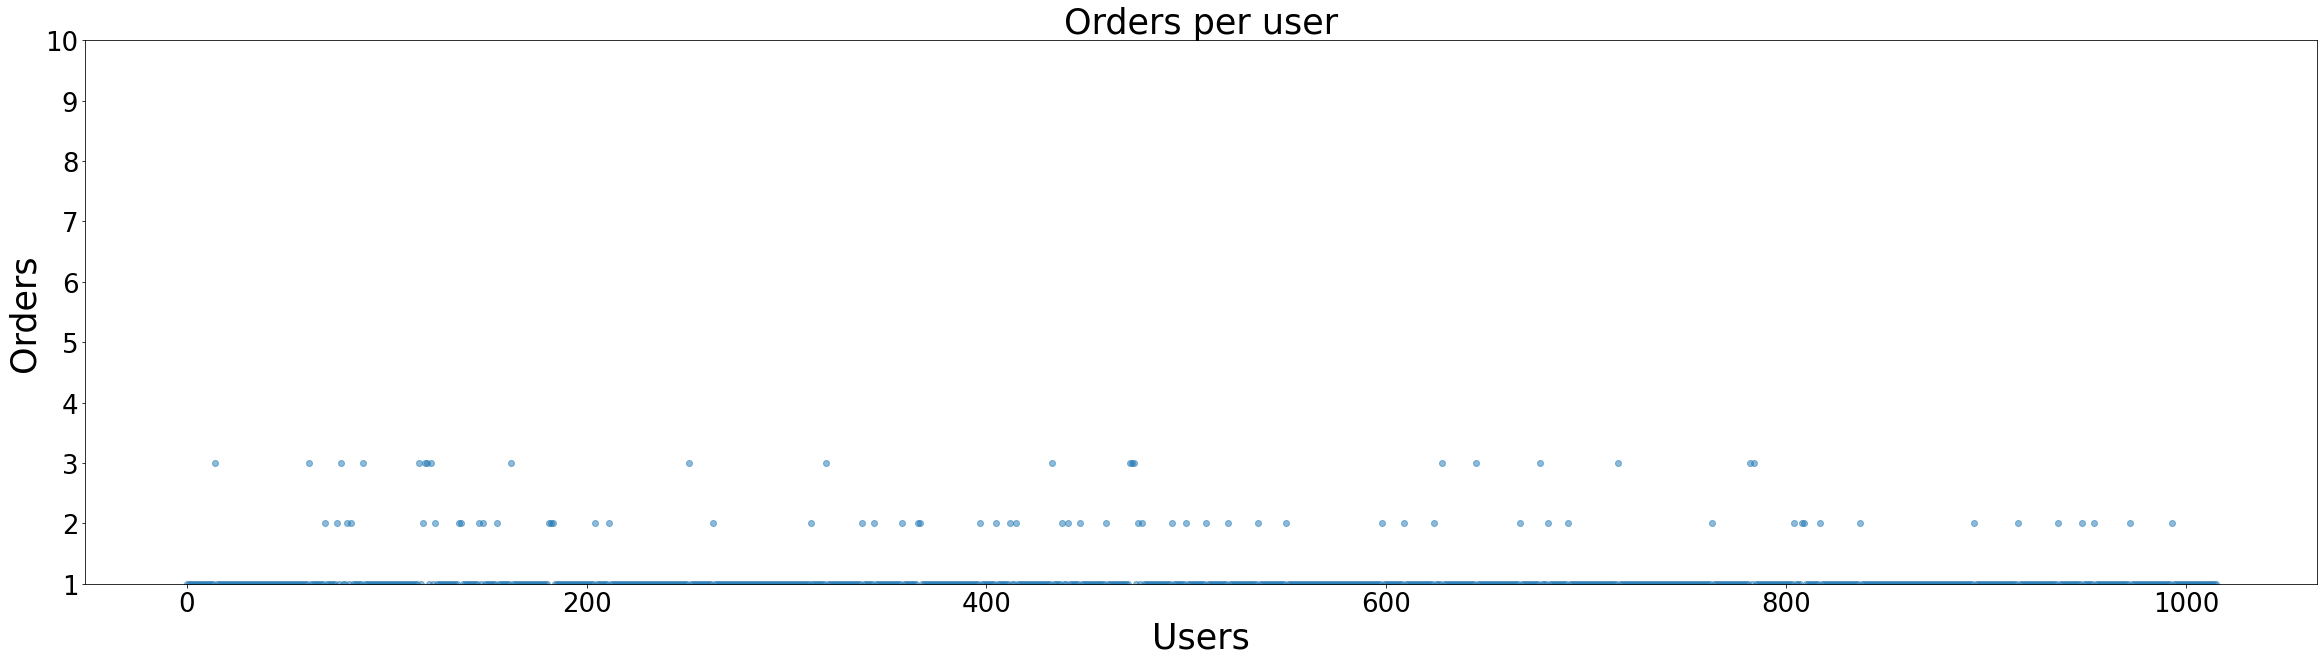

In [29]:
fig, ax = plt.subplots()
plt.title('Orders per user', fontdict={'fontsize': 35})
plt.xlabel("Users", fontdict={'fontsize': 35})
plt.ylabel("Orders", fontdict={'fontsize': 35})
y_values = pd.Series(range(0,len(orders['order'])))
x_values = pd.Series(range(0,len(orders['visitorid'])))
plt.scatter(x_values, orders['order'], alpha=0.5)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.set_ylim(ymin=1, ymax=10)
plt.show()

It can be seen that the vast majority of users place one order with very few exceptions who order more.

Because if there is a straight line then it means that the increase in the number of orders is equal to the increase in the number of buyers - which means that each person orders one order ..

6. 95th and 99th percentiles for the number of orders per user:

In [30]:
cumudata['order_per_user']= cumudata['orders']/cumudata['buyers']
cumudata['order_per_user'].head()

0    1.210526
1    1.000000
2    1.166667
3    1.025641
4    1.100000
Name: order_per_user, dtype: float64

In [31]:
np.percentile(opu['order'], [95, 99])

array([1., 2.])

95th percentiles for the number of orders per user :2.

99th percentiles for the number of orders per user :4.

According to the percentages examined in the above test it can be seen that 95 percent of users place 2 orders so it must be concluded that each user orders one order and those exceptions (which also raised our average) are those who ordered more than one order.

Conclusion - Our anomalous number is 2 and exceptions should be removed..

In [32]:
orders_n = orders.query('order < 2')

7.Scatter chart of order prices:

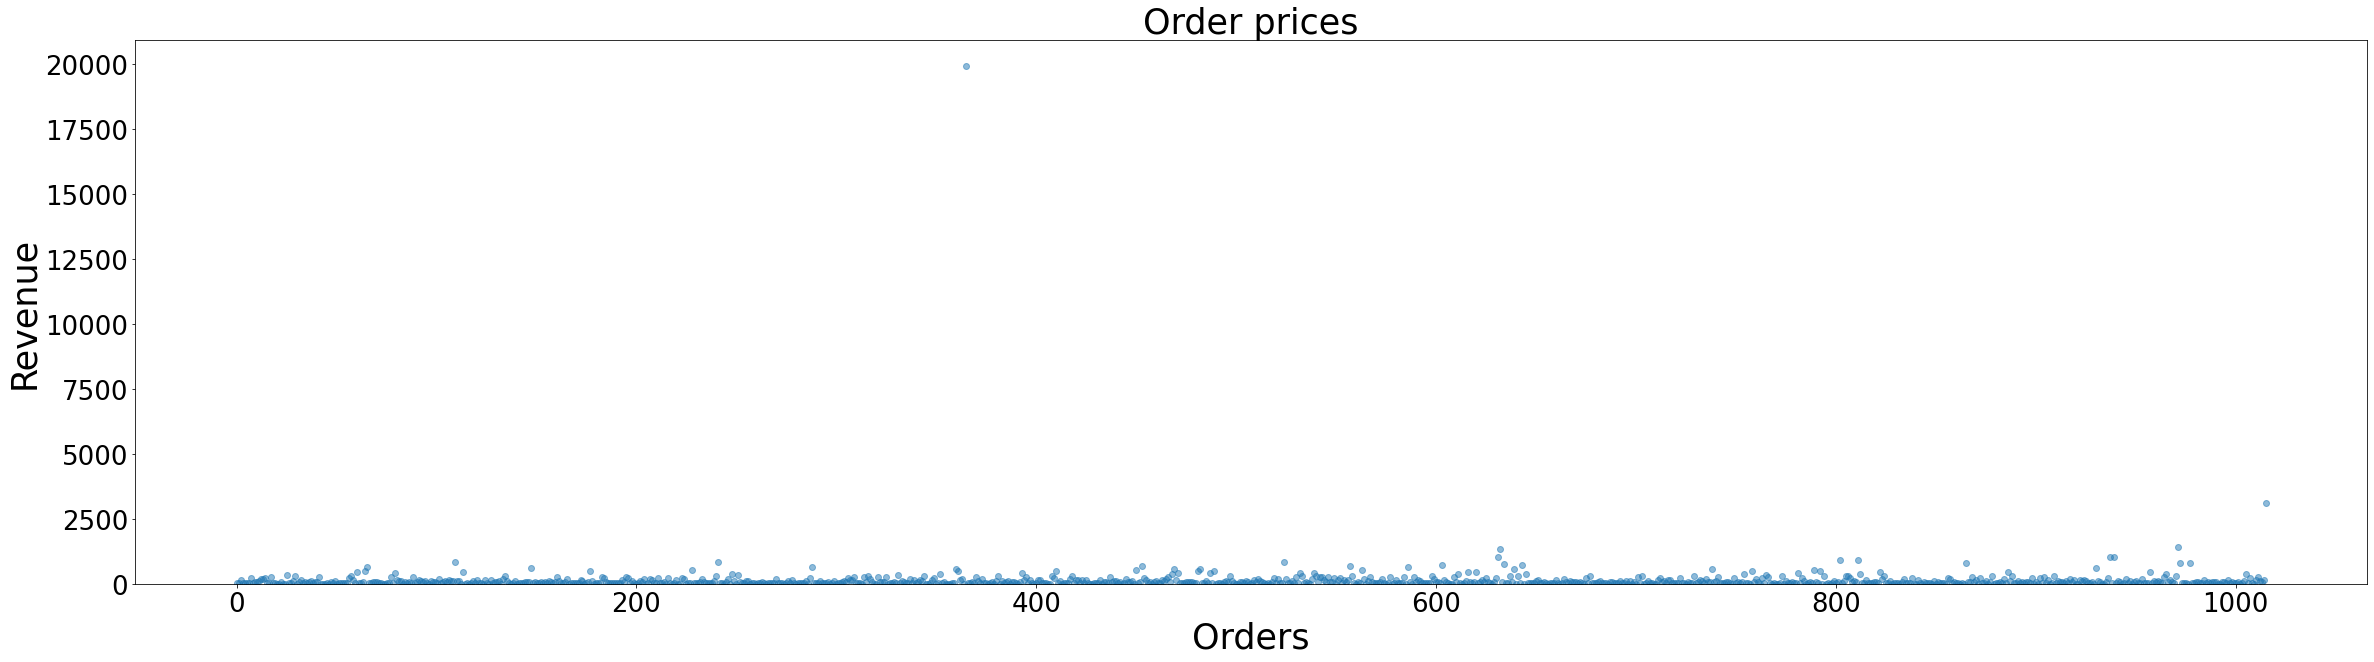

In [33]:
fig, ax = plt.subplots()
plt.title('Order prices', fontdict={'fontsize': 35})
plt.xlabel("Orders", fontdict={'fontsize': 35})
plt.ylabel("Revenue", fontdict={'fontsize': 35})
x_values1 = pd.Series(range(0,len(orders['order'])))
plt.scatter(x_values1, orders['revenue'], alpha=0.5)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.set_ylim(ymin=0)
plt.show()

According to the scatter chart we can see that the order prices range from 0 to 500, if so we have a few exceptions up to a price of 2500 and one very large exception that distorts our entire data set.
Conclusion - The exceptions should be removed.

8. 95th and 99th percentiles for the number of Order prices:

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

95th percentiles for orders prices : 435.54$.

99th percentiles for orders prices : 830.3$.

According to the 95th and 99th percentiles for the number of order prices, We can set the anomalous price to be around $ 435.

In [35]:
orders_n = orders.query('revenue < 435')

9.Statistical significance of the difference in conversion between the groups:

In [36]:
alfa = 0.05
#H0 = Conversion in group A == Conversion in group B
#H1 = Conversion in group A != Conversion in group B

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
#I use the Man-Whitney test to see if there is a difference between the groups in the conversion.
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


Conclusion: based on the raw data, we reject H0 using significance level 0.05.

The first row of the output gives us the p-value, 0.009, which is lower than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.

the relative profit of group B is 18.3% (the second row of the output).

10. Statistical significance of the difference in average order size between the groups:

In [37]:
alfa = 0.05
#H0 = Order size in group A == Order size in group B
#H1 = Order size in group A != Order size in group B

#I use the Man-Whitney test to see if there is a difference between the groups in the order size.
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


Conclusion: based on the raw data, we can't reject H0 using significance level 0.05.

The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups.

Let's find the total number of anomalous users:

In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 435]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

937    148427295
792    204675465
586    358944393
36     366673373
557    382846391
Name: visitorid, dtype: int64
(66,)


In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

11.Statistical significance of the difference in conversion between the groups- filtered data:

In [40]:
alfa = 0.05
#H0 = Conversion in group A == Conversion in group B
#H1 = Conversion in group A != Conversion in group B

#I use the Man-Whitney test to see if there is a difference between the groups in the conversion.
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.002
0.270


Conclusion: based on the raw data, we reject H0 using significance level 0.05.

The results for conversion almost didn't change.

The relative profit of group B almost didn't change.

Conclusion - The exceptions did not affect too much on the conversion between the groups.

12. Statistical significance of the difference in average order size between the groups-filtered data:

In [41]:
alfa = 0.05
#H0 = Order size in group A == Order size in group B
#H1 = Order size in group A != Order size in group B

#I use the Man-Whitney test to see if there is a difference between the groups in the conversion.
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.969
-0.013


Conclusion: based on the raw data, we can reject H0 using significance level 0.05.

The p-value is Rose significantly and raised the significance percentage to 99.6% 

The average order size completely reversed after we downloaded the exceptions, without which the average order size of Group A is higher at 0.4%.

Conclusion - The exceptions affect very much on the average order size.

13. A / B test results:

* We need to declare the test a success and stop it.

* group B conversion rate between the groups is 16.6%.

* The averge order cost is the same among groups.